In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin

In [2]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [3]:
col=iris.feature_names

In [4]:
df=pd.DataFrame(x,columns=col)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
df['target'] = y

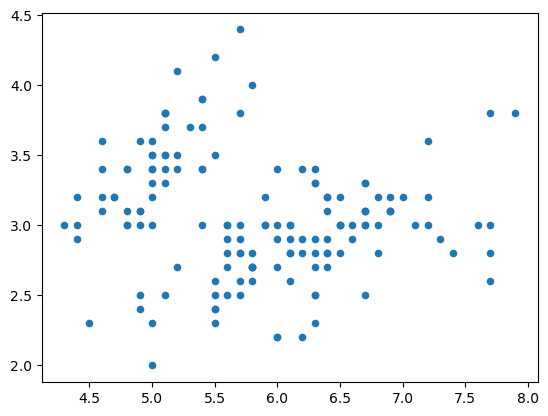

In [8]:
plt.scatter(x[:,0],x[:,1],s=20)
plt.show()

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<Axes: >

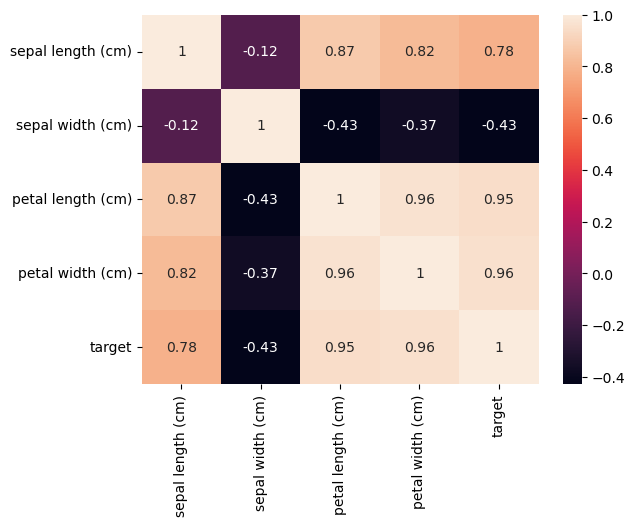

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.feature_selection import SelectKBest,f_classif
 
x.shape

(150, 4)

In [14]:
from sklearn.feature_selection import mutual_info_classif,SelectKBest
s=SelectKBest(mutual_info_classif,k=4)

In [15]:
y=df['target']

In [16]:
x=df.drop('target',axis=1)

In [17]:
c=s.fit_transform(x,y)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.svm import SVR,SVC

In [21]:
S=SVC()

In [22]:
from sklearn.model_selection import  GridSearchCV

In [23]:
param={'C':[0.1,10,100,0.01],'gamma':['scale','auto'],'kernel':['poly','rbf','linear']}

In [24]:
g=GridSearchCV(S,param,cv=5)

In [25]:
g.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 0.01], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'linear']})

In [26]:
g.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

In [27]:
df=pd.DataFrame(g.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004808,0.004638,0.002193,0.000418,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",1.000000,0.952381,0.952381,1.000000,0.952381,0.971429,0.023328,1
1,0.001197,0.000977,0.000998,0.000892,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.904762,0.904762,0.904762,1.000000,0.857143,0.914286,0.046657,18
2,0.003132,0.006264,0.000000,0.000000,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,11
3,0.000000,0.000000,0.003124,0.006249,0.1,auto,poly,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.952381,0.904762,0.904762,0.952381,1.000000,0.942857,0.035635,11
4,0.000000,0.000000,0.003124,0.006248,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,0.857143,0.809524,1.000000,0.857143,0.904762,0.079682,19
5,0.000000,0.000000,0.003124,0.006248,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",1.000000,0.904762,0.904762,1.000000,0.904762,0.942857,0.046657,11
6,0.003125,0.006249,0.000000,0.000000,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.952381,0.904762,0.904762,0.952381,0.952381,0.933333,0.023328,16
7,0.000000,0.000000,0.003125,0.006249,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.952381,0.952381,0.904762,1.000000,0.952381,0.952381,0.030117,3
8,0.000000,0.000000,0.000000,0.000000,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.952381,0.904762,0.904762,1.000000,1.000000,0.952381,0.042592,3
9,0.003124,0.006248,0.000000,0.000000,10,auto,poly,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.952381,0.952381,0.904762,0.952381,0.952381,0.942857,0.019048,11


<Axes: xlabel='rank_test_score', ylabel='param_kernel'>

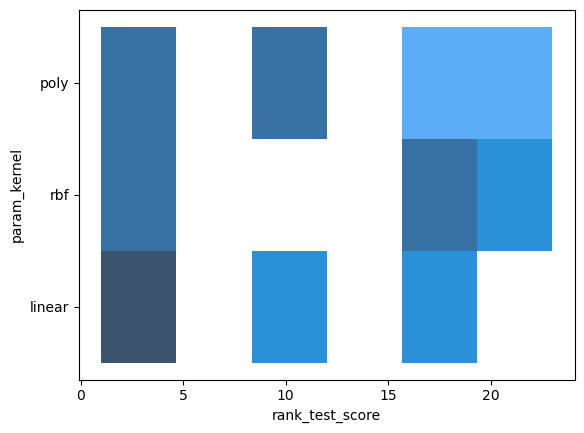

In [28]:
sns.histplot(data=df,x='rank_test_score',y='param_kernel',hue=None,bins='auto',element='Bar',shrink=1,legend=True,ax=None)

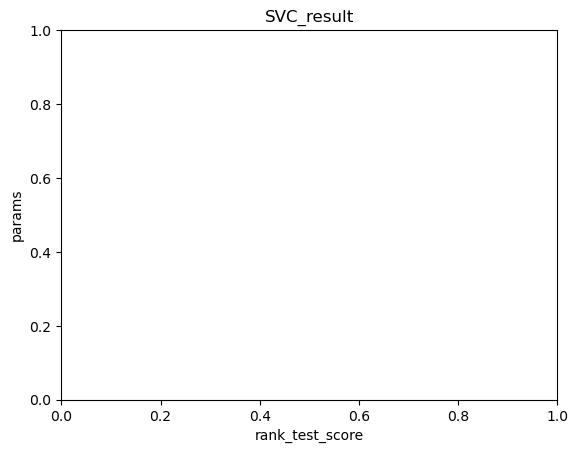

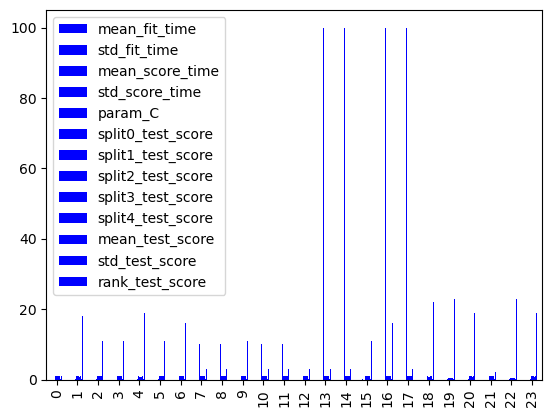

In [29]:
plt.title('SVC_result')
plt.xlabel('rank_test_score')
plt.ylabel('params')
df.plot(kind='bar',color='blue')
plt.show()

In [30]:
x_new = SelectKBest(f_classif, k=3).fit_transform(x, y)
x_new.shape

(150, 3)

In [31]:
n_cluster=2

In [32]:
c=np.random.RandomState(3)
i=c.permutation(y.shape[0])[:n_cluster]
print('permutation:',i)

permutation: [47  3]


In [33]:
# centroid=x[i]
# print('initial centroid:',centroid)

KeyError: "None of [Int64Index([47, 3], dtype='int64')] are in the [columns]"

In [ ]:
while True:
    labels=pairwise_distances_argmin(x,centroid)
    print('Calculated distance',labels)
    new_centroid=np.array([x[labels==i].mean(0) for i in range(n_cluster)])
    print('updated centroid:',new_centroid)
    if np.all(centroid==new_centroid):
        break
    centroid=new_centroid
    print(centroid)
    print()
    

In [ ]:
plt.scatter(x[:,0],x[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centroid[:,0],centroid[:,1],s=50,c='red')
plt.title('k-mean clustering')
plt.show()

In [ ]:
y=[[0,0]]

In [ ]:
label=pairwise_distances_argmin(y,centroid)
print("calculated distance",label)

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0,n_init='auto')
kmeans.fit(x)
l=kmeans.labels_
kmeans.predict([[0,1]])